In [24]:
import numpy 
import pandas as pd


In [82]:
def matrix_factorization(R, P, Q, K, steps=2000, alpha=0.0002, beta=0.02):
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    # print(R[i][j])
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)
        
        e = 0

        for i in range(len(R)):

            for j in range(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)

        # 0.001: local minimum
        if step%500:er.append(e)
        if e < 0.001:

            break

    return P, Q.T


In [119]:
er=[]
R = [
     [5,3,0,1,2,5,3,0,1,0],
     [4,0,0,1,0,5,3,2,0,3],
     [1,1,0,5,0,2,4,0,1,2],
     [1,0,0,4,3,1,3,1,1,1],
     [0,1,5,4,5,0,3,5,1,0],
     [2,1,3,0,0,5,1,3,1,2],
     [5,3,0,1,2,5,3,0,1,0],
     [4,0,0,1,0,5,3,2,0,3],
     [1,1,0,5,0,2,4,0,1,2],
     [1,0,0,4,3,1,3,1,1,1],
     [0,1,5,4,5,0,3,5,1,0],
     [2,1,3,0,0,5,1,3,1,2],
    ]

R = numpy.array(R)
# N: num of User
N = len(R)
# M: num of Movie
M = len(R[0])
# Num of Features
K = 3

 
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

 

nP, nQ = matrix_factorization(R, P, Q, K)

nR = numpy.dot(nP, nQ.T)

In [120]:
numpy.round(nR),R

(array([[5., 3., 3., 1., 2., 5., 3., 3., 1., 3.],
        [4., 3., 3., 1., 2., 5., 3., 2., 1., 3.],
        [1., 1., 3., 5., 4., 2., 4., 2., 1., 2.],
        [1., 0., 2., 4., 3., 1., 3., 1., 1., 1.],
        [3., 1., 5., 4., 5., 6., 3., 5., 1., 3.],
        [2., 1., 3., 1., 3., 4., 1., 3., 1., 2.],
        [5., 3., 4., 1., 2., 6., 3., 3., 1., 3.],
        [4., 3., 3., 1., 2., 5., 3., 2., 1., 3.],
        [1., 1., 3., 5., 4., 2., 4., 2., 1., 2.],
        [1., 0., 2., 4., 3., 1., 3., 1., 1., 1.],
        [3., 1., 5., 4., 5., 6., 3., 5., 1., 3.],
        [2., 1., 3., 1., 3., 4., 1., 3., 1., 2.]]),
 array([[5, 3, 0, 1, 2, 5, 3, 0, 1, 0],
        [4, 0, 0, 1, 0, 5, 3, 2, 0, 3],
        [1, 1, 0, 5, 0, 2, 4, 0, 1, 2],
        [1, 0, 0, 4, 3, 1, 3, 1, 1, 1],
        [0, 1, 5, 4, 5, 0, 3, 5, 1, 0],
        [2, 1, 3, 0, 0, 5, 1, 3, 1, 2],
        [5, 3, 0, 1, 2, 5, 3, 0, 1, 0],
        [4, 0, 0, 1, 0, 5, 3, 2, 0, 3],
        [1, 1, 0, 5, 0, 2, 4, 0, 1, 2],
        [1, 0, 0, 4, 3, 1, 3, 1, 1, 1]

In [121]:
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds

In [122]:
u,s,v = svds(R.astype('float'))

In [123]:
u.shape,s.shape,v.shape 

((12, 6), (6,), (6, 10))

In [124]:
s_d = numpy.diag(s)
s_d

array([[ 1.58555675,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  3.4240182 ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  6.07383398,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  8.82765703,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 12.73610292,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        21.88000922]])

In [125]:
r_hat = numpy.dot(numpy.dot(u,s_d),v)
r_hat.round()

array([[ 5.,  3., -0.,  1.,  2.,  5.,  3.,  0.,  1.,  0.],
       [ 4., -0.,  0.,  1.,  0.,  5.,  3.,  2., -0.,  3.],
       [ 1.,  1., -0.,  5.,  0.,  2.,  4., -0.,  1.,  2.],
       [ 1.,  0., -0.,  4.,  3.,  1.,  3.,  1.,  1.,  1.],
       [ 0.,  1.,  5.,  4.,  5.,  0.,  3.,  5.,  1., -0.],
       [ 2.,  1.,  3., -0.,  0.,  5.,  1.,  3.,  1.,  2.],
       [ 5.,  3., -0.,  1.,  2.,  5.,  3.,  0.,  1.,  0.],
       [ 4., -0.,  0.,  1.,  0.,  5.,  3.,  2., -0.,  3.],
       [ 1.,  1., -0.,  5.,  0.,  2.,  4., -0.,  1.,  2.],
       [ 1.,  0., -0.,  4.,  3.,  1.,  3.,  1.,  1.,  1.],
       [ 0.,  1.,  5.,  4.,  5.,  0.,  3.,  5.,  1., -0.],
       [ 2.,  1.,  3., -0.,  0.,  5.,  1.,  3.,  1.,  2.]])

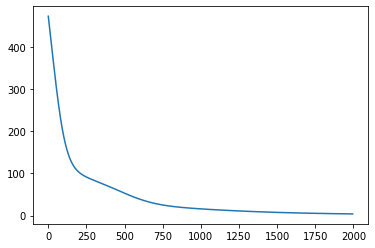

In [126]:
import matplotlib.pyplot as plt
plt.plot(er)